# Final Project (Neural Network)

In [1]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score 
import numpy as np
import numpy.random as r 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('heartDisease.csv') 
print(df.shape)

(303, 14)


In [3]:
df1 = df.dropna(axis = 1)
print(df1.shape)

(303, 14)


In [4]:
df2 = df.values
print(df2.shape)

(303, 14)


In [5]:
X = df2[:,0:13]
Y = df2[:,-1]
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


In [6]:
Y = Y.reshape(Y.shape[0], 1)
print(Y.shape)

(303, 1)


In [7]:
r.shuffle(X)
r.shuffle(Y)
print(X.shape)
print(Y.shape)

(303, 13)
(303, 1)


In [8]:
X_scale = StandardScaler()
X = X_scale.fit_transform(X)
X

array([[ 0.5110413 ,  0.68100522,  1.97312292, ..., -0.64911323,
        -0.71442887,  1.12302895],
       [-0.81242462,  0.68100522,  1.00257707, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.84190778,  0.68100522,  1.00257707, ..., -0.64911323,
         2.22410436,  1.12302895],
       ...,
       [-1.69473524,  0.68100522, -0.93851463, ..., -0.64911323,
        -0.71442887,  1.12302895],
       [ 0.73161895, -1.46841752, -0.93851463, ..., -0.64911323,
        -0.71442887,  1.12302895],
       [ 1.28306308, -1.46841752,  1.97312292, ..., -2.27457861,
        -0.71442887, -0.51292188]])

In [9]:
#Using 75:25 train:test split
X_train = X[0:228]
Y_train = Y[0:228]
X_test = X[228:]
Y_test = Y[228:]

# Sigmoid Activation

In [10]:
def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

In [11]:
def setup_and_init_weights(nn_structure):
    W = {} 
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))  
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [12]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [13]:
def feed_forward(x, W, b):
    a = {1: x}
    z = { }
    for l in range(1, len(W) + 1): 
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  
        a[l+1] = f(z[l+1]) 
    return a, z

In [14]:
def calculate_out_layer_delta(y, a_out, z_out):
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [15]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            a, z = feed_forward(X[i, :], W, b)
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    tri_b[l] += delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [16]:
nn_structure = [13, 35, 2]
    
W, b, avg_cost_func = train_nn(nn_structure, X_train, Y_train, 3000)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


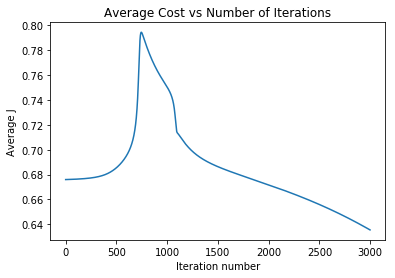

In [17]:
plt.title ("Average Cost vs Number of Iterations")
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [18]:
Y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}'.format(accuracy_score(Y_test, Y_pred)))

Prediction accuracy is 0.5066666666666667


# Change number of hidden neurons

In [ ]:
nn_structure = [13, 70, 2]
    
W2, b2, avg_cost_func2 = train_nn(nn_structure, X_train, Y_train, 3000)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000


In [ ]:
plt.title ("Average Cost vs Number of Iterations")
plt.plot(avg_cost_func2)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [ ]:
Y_pred2 = predict_y(W2, b2, X_test, 3)
print('Prediction accuracy is {}'.format(accuracy_score(Y_test, Y_pred2)))

# Change number of iterations

In [ ]:
nn_structure = [13, 35, 2]
    
W3, b3, avg_cost_func3 = train_nn(nn_structure, X_train, Y_train, 10000)

In [ ]:
plt.title ("Average Cost vs Number of Iterations")
plt.plot(avg_cost_func3)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [ ]:
Y_pred3 = predict_y(W3, b3, X_test, 3)
print('Prediction accuracy is {}'.format(accuracy_score(Y_test, Y_pred3)))

# tanh Activation

In [ ]:
def f2(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))


def f_deriv2(z):
    return 1 - (f2(z)**2)

In [ ]:
def setup_and_init_weights2(nn_structure):
    W = {} 
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))  
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [ ]:
def init_tri_values2(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [ ]:
def feed_forward2(x, W, b):
    a = {1: x}
    z = { }
    for l in range(1, len(W) + 1): 
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  
        a[l+1] = f2(z[l+1]) 
    return a, z

In [ ]:
def calculate_out_layer_delta2(y, a_out, z_out):
    return -(y-a_out) * f_deriv2(z_out) 


def calculate_hidden_delta2(delta_plus_1, w_l, z_l):
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv2(z_l)

In [ ]:
def train_nn2(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights2(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values2(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            a, z = feed_forward2(X[i, :], W, b)
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta2(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta2(delta[l+1], W[l], z[l])
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    tri_b[l] += delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [ ]:
nn_structure = [13, 35, 2]
    
W4, b4, avg_cost_func4 = train_nn(nn_structure, X_train, Y_train, 3000)

In [ ]:
plt.title ("Average Cost vs Number of Iterations")
plt.plot(avg_cost_func4)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [ ]:
Y_pred4 = predict_y(W4, b4, X_test, 3)
print('Prediction accuracy is {}'.format(accuracy_score(Y_test, Y_pred4)))

# Change number of hidden neurons

In [ ]:
nn_structure = [13, 70, 2]
    
W5, b5, avg_cost_func5 = train_nn2(nn_structure, X_train, Y_train, 3000)

In [ ]:
plt.title ("Average Cost vs Number of Iterations")
plt.plot(avg_cost_func5)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [ ]:
Y_pred5 = predict_y(W5, b5, X_test, 3)
print('Prediction accuracy is {}'.format(accuracy_score(Y_test, Y_pred5)))

# Change Number of Iterations

In [ ]:
nn_structure = [13, 35, 2]
    
W6, b6, avg_cost_func6 = train_nn2(nn_structure, X_train, Y_train, 10000)

In [ ]:
plt.title ("Average Cost vs Number of Iterations")
plt.plot(avg_cost_func6)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [ ]:
Y_pred6 = predict_y(W6, b6, X_test, 3)
print('Prediction accuracy is {}'.format(accuracy_score(Y_test, Y_pred6)))